# Modelo de Aprendizagem Linear Voted Perceptron

Este _python notebook_ descreve a implementaçào do modelo de aprendizagem **Voted Perceptron** que é uma variação do **Perceptron**, que é um modelo de aprendizagem linear ideal para problemas linearmente separáveis.

### Perceptron
O Perceptron é um modelo de aprendizagem linear. Seu funcionamento se baseia no método do gradiente descendente para encontrar um _hiperplano_ que divide o conjunto de dados linearmente, por esta razão, o perceptron é indicado para problemas linearmente separáveis.

### Dataset
Neste trabalho utilizaremos o conjunto de dados [_Breast Cancer Wisconsin (Diagnostic) Data Set_][1]. Este conjunto de dados contém dados computados a partir de imagens de tumores de mama e uma _label_ definindo se o tumor é maligno ou benígno.


[1]: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

In [52]:
from pandas import *
from sklearn.linear_model import Perceptron
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

breast_cancer = datasets.load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

print('Data:\n', X[0])
print('Target:\n', y)



Data:
 [  1.79900000e+01   1.03800000e+01   1.22800000e+02   1.00100000e+03
   1.18400000e-01   2.77600000e-01   3.00100000e-01   1.47100000e-01
   2.41900000e-01   7.87100000e-02   1.09500000e+00   9.05300000e-01
   8.58900000e+00   1.53400000e+02   6.39900000e-03   4.90400000e-02
   5.37300000e-02   1.58700000e-02   3.00300000e-02   6.19300000e-03
   2.53800000e+01   1.73300000e+01   1.84600000e+02   2.01900000e+03
   1.62200000e-01   6.65600000e-01   7.11900000e-01   2.65400000e-01
   4.60100000e-01   1.18900000e-01]
Target:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 

### Redução de dimensionalidade
Como podemos observar, o conunto de dados contém muitas dimensões. Para aproveitarmos o melhor desempenho do modelo, podemos aplicar um algoritmo de redução de dimensionalidade, neste caso, o PCA.

Text(0.5,1,'PCA of Breast Cancer Dataset')

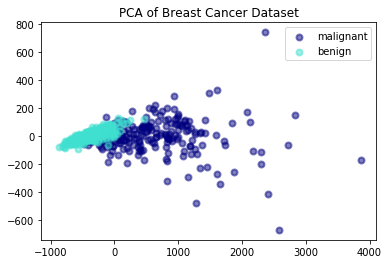

In [53]:
from sklearn.decomposition import PCA
target_names = breast_cancer.target_names
pca = PCA(n_components=2)
Xr = pca.fit(X).transform(X)

colors = ['navy', 'turquoise']
lw = 2

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(Xr[Y == i, 0], Xr[Y == i, 1], color=color, alpha=.5, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Breast Cancer Dataset')

Agora, separamos os grupos de treino e teste para o treinamento do perceptron

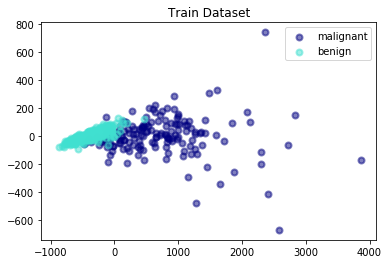

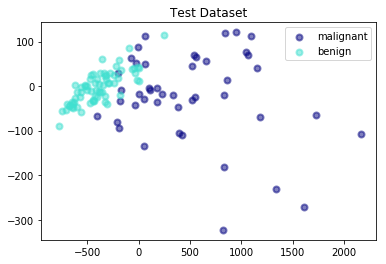

In [54]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Xr, y, test_size=.2)

plt.figure()
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(Xtrain[Ytrain == i, 0], Xtrain[Ytrain == i, 1], color=color, alpha=.5, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Train Dataset')

plt.figure()
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(Xtest[Ytest == i, 0], Xtest[Ytest == i, 1], color=color, alpha=.5, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Test Dataset')

plt.show()


Com estes conjuntos, podemos testar o algoritmo perceptron e comparar seu desempenho com o voted perceptron posteriormente.

Accuracy score:  0.90350877193
Metrics Report
             precision    recall  f1-score   support

  malignant       0.97      0.78      0.86        45
     benign       0.87      0.99      0.93        69

avg / total       0.91      0.90      0.90       114



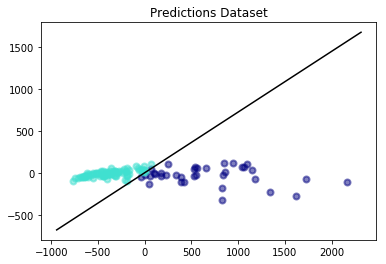

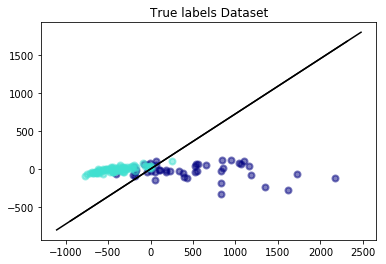

In [76]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

clf = Perceptron(eta0=0.002, max_iter=100)
clf.fit(Xtrain, Ytrain)

Ypred = clf.predict(Xtest) # make predictions

print('Accuracy score: ', accuracy_score(Ytest, Ypred))
print('Metrics Report')
print(classification_report(Ytest, Ypred, target_names=target_names))

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(Xtest[Ypred == i, 0], Xtest[Ypred == i, 1], color=color, alpha=.5, lw=lw)
plt.title('Predictions Dataset')

xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xmin, xmax)
yy = a * xx - (clf.intercept_[0]) / w[1] 
plt.plot(xx,yy, 'k-')

plt.figure()
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(Xtest[Ytest == i, 0], Xtest[Ytest == i, 1], color=color, alpha=.5, lw=lw)
plt.title('True labels Dataset')
plt.plot(xx,yy, 'k-')

xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xmin, xmax)
yy = a * xx - (clf.intercept_[0]) / w[1] 
plt.plot(xx,yy, 'k-')

### Voted Perceptron

Agora podemos implementar a variante do modelo Perceptron chamada Voted Perceptron.

A proposta deste modelo é melhorar ter um melhor desempenho em conjuntos de dados linearmente separáveis com grandes margens de separação. No algoritmo, são armazenadas mais informações durante o treinamento para utilizar estas informações e, assim, gerar resultados melhores nas iterações seguintes do treinamento.

In [153]:
class VotedPerceptron:
    def __init__(self, n_iter):
        self.n_iter = n_iter
        self.V = []
        self.C = []
        self.k = 0
    
    def fit(self, x, y):
        for i in range(len(y)):
            if y[i] == 0:
                y[i] = -1
        k = 0
        v = [np.ones_like(x)[0]]
        c = [0]
        for epoch in range(self.n_iter): # runs through the data n_iter times
            for i in range(len(x)):
                pred = 1 if np.dot(v[k], x[i]) > 0 else -1 # checks the sing of v*k
                if pred == y[i]: # checks if the prediction matches the real Y
                    c[k] += 1 # increments c
                else:
                    v.append(np.add(v[k], np.dot(y[i], x[i])))
                    c.append(1)
                    k += 1
        self.V = v
        self.C = c
        self.k = k

    def predict(self, X):
        preds = []
        for x in X:
            s = 0
            for w,c in zip(self.V,self.C):
                s = s + c*np.sign(np.dot(w,x))
            preds.append(np.sign(1 if s>= 0 else 0))
        return preds

In [154]:
v_perc = VotedPerceptron(n_iter=100)
v_perc.fit(Xtrain, Ytrain)
Ypred = v_perc.predict(Xtest)
print('Accuracy score: ', accuracy_score(Ytest, Ypred))
print('Metrics Report')
print(classification_report(Ytest, Ypred, target_names=target_names))

Accuracy score:  0.90350877193
Metrics Report
             precision    recall  f1-score   support

  malignant       0.97      0.78      0.86        45
     benign       0.87      0.99      0.93        69

avg / total       0.91      0.90      0.90       114

